<a href="https://colab.research.google.com/github/nazuranajmi/nazuranajmi/blob/main/None_Linear_Regression_JULY2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget -O FuelConsumption.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv

--2024-07-23 02:18:51--  https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/FuelConsumptionCo2.csv
Resolving s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)... 67.228.254.196
Connecting to s3-api.us-geo.objectstorage.softlayer.net (s3-api.us-geo.objectstorage.softlayer.net)|67.228.254.196|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72629 (71K) [text/csv]
Saving to: ‘FuelConsumption.csv’

FuelConsumption.csv 100%[===================>]  70.93K  --.-KB/s    in 0.04s   

2024-07-23 02:18:51 (1.66 MB/s) - ‘FuelConsumption.csv’ saved [72629/72629]



In [ ]:
import pandas as pd

df = pd.read_csv("FuelConsumption.csv")

df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [ ]:
df.corr(numeric_only=True)

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
MODELYEAR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ENGINESIZE,NaN,1.000000,0.934011,0.832225,0.778746,0.819482,-0.808554,0.874154
CYLINDERS,NaN,0.934011,1.000000,0.796473,0.724594,0.776788,-0.770430,0.849685
FUELCONSUMPTION_CITY,NaN,0.832225,0.796473,1.000000,0.965718,0.995542,-0.935613,0.898039
FUELCONSUMPTION_HWY,NaN,0.778746,0.724594,0.965718,1.000000,0.985804,-0.893809,0.861748
FUELCONSUMPTION_COMB,NaN,0.819482,0.776788,0.995542,0.985804,1.000000,-0.927965,0.892129
FUELCONSUMPTION_COMB_MPG,NaN,-0.808554,-0.770430,-0.935613,-0.893809,-0.927965,1.000000,-0.906394
CO2EMISSIONS,NaN,0.874154,0.849685,0.898039,0.861748,0.892129,-0.906394,1.000000


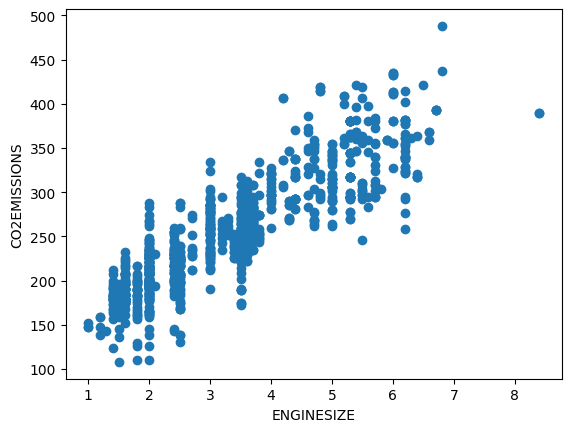

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df.ENGINESIZE, df.CO2EMISSIONS)
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [ ]:
import numpy as np

msk = np.random.rand(len(df)) < 0.75
train = df[msk]
test = df[~msk]

**Polynomial Regression**

$$y = b + \theta\_1  x + \theta\_2 x^2$$

In [ ]:
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures

#training the model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

poly = PolynomialFeatures(degree=2)  #degree following the distribution of the data (default=2)

train_x_poly = poly.fit_transform(train_x)

clf = linear_model.LinearRegression()

train_y_ = clf.fit(train_x_poly, train_y)


#prediction
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly = poly.fit_transform(test_x)

test_y_ = clf.predict(test_x_poly)

#Evaluation

from sklearn.metrics import r2_score

print('The R2 Score is: ', (r2_score(test_y, test_y_))*100)
print ('The MSE is: ', np.mean((test_y_ - test_y)**2))



The R2 Score is:  73.41267786965847
The MSE is:  1059.3449931015423


Text(0, 0.5, 'Emission')

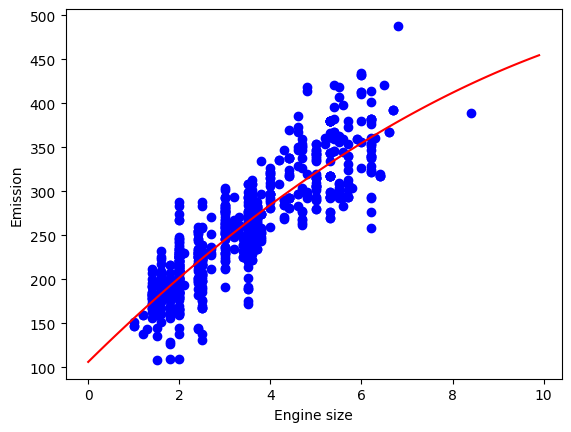

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')

XX = np.arange(0.0, 10.0, 0.1)
yy = clf.intercept_[0]+ clf.coef_[0][1]*XX+ clf.coef_[0][2]*np.power(XX, 2)

plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [ ]:
#train the model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

poly4 = PolynomialFeatures(degree=4)
train_x_poly4 = poly4.fit_transform(train_x)

clf4 = linear_model.LinearRegression()

train_y_ = clf4.fit(train_x_poly4, train_y)

#prediction
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly4 = poly4.fit_transform(test_x)

test_y_ = clf4.predict(test_x_poly4)

#Evaluation

from sklearn.metrics import r2_score

print('The R2-score is: ', (r2_score(test_y_, test_y))*100)
print('The MSE is:', np.mean((test_y_ - test_y)**2))


The R2-score is:  63.21131622393942
The MSE is: 1054.632169496108


Text(0, 0.5, 'Emission')

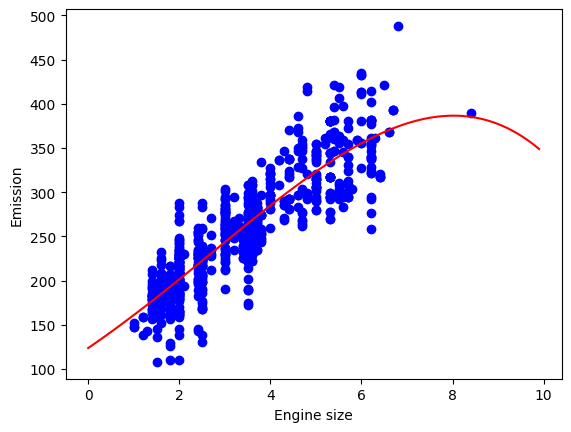

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf4.intercept_[0]+ clf4.coef_[0][1]*XX + clf4.coef_[0][2]*np.power(XX, 2) + clf4.coef_[0][3]*np.power(XX, 3) + clf4.coef_[0][4]*np.power(XX, 4)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")

In [ ]:
#train the model
train_x = np.asanyarray(train[['ENGINESIZE']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])

poly8 = PolynomialFeatures(degree=8)
train_x_poly8 = poly8.fit_transform(train_x)

clf8 = linear_model.LinearRegression()

train_y_ = clf8.fit(train_x_poly8, train_y)

#prediction
test_x = np.asanyarray(test[['ENGINESIZE']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

test_x_poly8 = poly8.fit_transform(test_x)

test_y_ = clf8.predict(test_x_poly8)

#Evaluation

from sklearn.metrics import r2_score

print('The R2-score is: ', (r2_score(test_y_, test_y))*100)
print('The MSE is:', np.mean((test_y_ - test_y)**2))

The R2-score is:  64.65495599127489
The MSE is: 1039.101497082398


Text(0, 0.5, 'Emission')

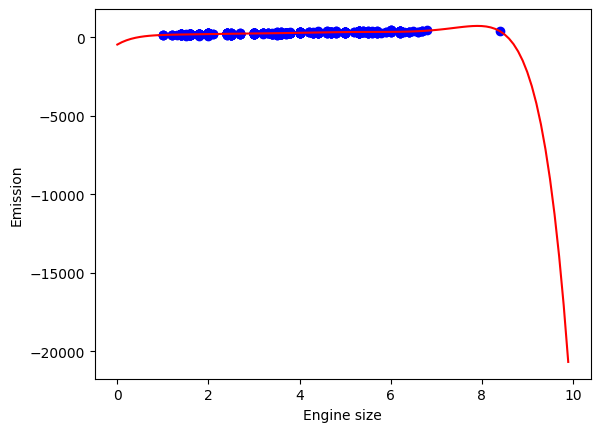

In [ ]:
plt.scatter(train.ENGINESIZE, train.CO2EMISSIONS,  color='blue')
XX = np.arange(0.0, 10.0, 0.1)
yy = clf8.intercept_[0]+ clf8.coef_[0][1]*XX + clf8.coef_[0][2]*np.power(XX, 2) + clf8.coef_[0][3]*np.power(XX, 3) + clf8.coef_[0][4]*np.power(XX, 4)+ clf8.coef_[0][5]*np.power(XX, 5)+ clf8.coef_[0][6]*np.power(XX, 6)+ clf8.coef_[0][7]*np.power(XX, 7)+ clf8.coef_[0][8]*np.power(XX, 8)
plt.plot(XX, yy, '-r' )
plt.xlabel("Engine size")
plt.ylabel("Emission")